<a href="https://colab.research.google.com/github/aragornchunletia/Mixtape/blob/main/ols(continue).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3> Assumption 5</h3>
<h5> Homoskedascity: $$
V[X|Y] = σ^2
$$</h5>

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [40]:
data = pd.read_stata("/content/auto.dta")

In [5]:
data.head(10)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
5,Buick LeSabre,5788,18,3.0,4.0,21,3670,218,43,231,2.73,Domestic
6,Buick Opel,4453,26,NaN,3.0,10,2230,170,34,304,2.87,Domestic
7,Buick Regal,5189,20,3.0,2.0,16,3280,200,42,196,2.93,Domestic
8,Buick Riviera,10372,16,3.0,3.5,17,3880,207,43,231,2.93,Domestic
9,Buick Skylark,4082,19,3.0,3.5,13,3400,200,42,231,3.08,Domestic


In [6]:
data[data.isnull().any(axis = 1)]

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
6,Buick Opel,4453,26,NaN,3.0,10,2230,170,34,304,2.87,Domestic
44,Plym. Sapporo,6486,26,NaN,1.5,8,2520,182,38,119,3.54,Domestic
50,Pont. Phoenix,4424,19,NaN,3.5,13,3420,203,43,231,3.08,Domestic
63,Peugeot 604,12990,14,NaN,3.5,14,3420,192,38,163,3.58,Foreign


In [7]:
data.describe()

,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio
count,74.000000,74.000000,69.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,6165.256757,21.297297,3.405797,2.993243,13.756757,3019.459459,187.932432,39.648649,197.297297,3.014865
std,2949.495885,5.785503,0.989932,0.845995,4.277404,777.193567,22.266340,4.399354,91.837219,0.456287
min,3291.000000,12.000000,1.000000,1.500000,5.000000,1760.000000,142.000000,31.000000,79.000000,2.190000
25%,4220.250000,18.000000,3.000000,2.500000,10.250000,2250.000000,170.000000,36.000000,119.000000,2.730000
50%,5006.500000,20.000000,3.000000,3.000000,14.000000,3190.000000,192.500000,40.000000,196.000000,2.955000
75%,6332.250000,24.750000,4.000000,3.500000,16.750000,3600.000000,203.750000,43.000000,245.250000,3.352500
max,15906.000000,41.000000,5.000000,5.000000,23.000000,4840.000000,233.000000,51.000000,425.000000,3.890000


In [10]:
data['foreign'].unique()

['Domestic', 'Foreign']
Categories (2, object): ['Domestic' < 'Foreign']

In [41]:
data['foreign'] = data['foreign'].map({'Foreign':1 , 'Domestic':0})
data['manufacturer'] = data.make.apply(lambda x: x.split(" ")[0])
data["rep78"] = data["rep78"].fillna(3.4)

In [42]:
displacements = sorted(data['displacement'].unique())
def displacement_encoder(value):
    return min(value // 100, 4)
data['displacement'] = data['displacement'].apply(displacement_encoder)

In [53]:
data['headroom'].unique()

array([2.5, 3. , 4.5, 4. , 2. , 3.5, 1.5, 5. ], dtype=float32)

In [12]:
price = data[['price']]
manufacturer = data[['manufacturer']]
make = data[['make']]
data = data.drop(['price' , 'manufacturer','make'] , axis=1)

In [98]:
manuf_data = pd.get_dummies(data['manufacturer'], dtype=np.float64)

In [114]:
manuf_data['weight'] = data['weight']
manuf_data['length'] = data['length']
manuf_data['mpg'] = data['mpg']
manuf_data['displacement'] = data['displacement']
manuf_data['foreign'] = data['foreign']
manuf_data['headroom'] = data['headroom']
manuf_data['rep78'] = data['rep78']


In [120]:
train_m_x, test_m_x, train_m_y, test_m_y = train_test_split(manuf_data, price, test_size=0.2, random_state=100)

In [126]:

reg_model = LinearRegression()
reg_model.fit(train_m_x, train_m_y)
y_hat = reg_model.predict(train_m_x)

residuals = train_m_y - y_hat
sq_residuals = residuals ** 2

residual_model = LinearRegression()
residual_model.fit(train_m_x, sq_residuals)
r_squared = residual_model.score(train_m_x, sq_residuals)

# Step 4: Compute Breusch-Pagan test statistic
n, deg_free = train_m_x.shape
LM_stat = n * r_squared  # Correct LM statistic

# Step 5: Compute p-value
p_value = stats.chi2.sf(LM_stat, deg_free)

# Print results
print(f"Breusch-Pagan Test Statistic: {LM_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Heteroscedasticity detected (Reject H0)")
else:
    print("No evidence of heteroscedasticity (Fail to reject H0)")


Breusch-Pagan Test Statistic: 28.8147
p-value: 0.5273
No evidence of heteroscedasticity (Fail to reject H0)


In [15]:
features = data.columns
print(features.values)

['mpg' 'rep78' 'headroom' 'trunk' 'weight' 'length' 'turn' 'displacement'
 'gear_ratio' 'foreign']


In [16]:
train_x , test_x , train_y , test_y = train_test_split(data , price , test_size=0.2 , random_state=100)

In [17]:
train_x.head()

,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
23,28,4.0,1.5,9,1800,147,33,98,3.15,0
51,24,2.0,2.0,7,2690,179,41,151,2.73,0
54,25,4.0,2.5,12,2650,177,34,121,3.64,1
28,22,4.0,3.0,9,2580,169,39,140,2.73,0
73,17,5.0,2.5,14,3170,193,37,163,2.98,1


Let's Run multiple regression on this dataset using different features and then compare those results with a multivariate regression using all the features.


*   price, length
*   price, weight
*   price, mpg
*   price, displacement
*   price, manufacturer
*   price, length,weight,mpg
*   price, lenght,weight,mpg,displacement
*   price, full set of features



In [83]:
feature_subsets = (
    (train_x[['length']],train_y,"len"),
    (train_x[['weight']],train_y,"wei"),
    (train_x[['mpg']],train_y,"mpg"),
    (train_x[['displacement']],train_y,'dis'),
    (train_x[['length','weight','mpg']],train_y,"len-wei-mpg"),
    (train_x[['length','weight','mpg','displacement']],train_y,"len-wei-mpg-dis"),
    (train_m_x,train_m_y,"manufacturer"),
    (train_x,train_y,"full_set")
    )

In [84]:
for X,y,name in feature_subsets:
  print(f"{name} -> X{X.shape} , Y{y.shape}")

len -> X(59, 1) , Y(59, 1)
wei -> X(59, 1) , Y(59, 1)
mpg -> X(59, 1) , Y(59, 1)
dis -> X(59, 1) , Y(59, 1)
len-wei-mpg -> X(59, 3) , Y(59, 1)
len-wei-mpg-dis -> X(59, 4) , Y(59, 1)
manufacturer -> X(59, 23) , Y(59, 1)
full_set -> X(59, 10) , Y(59, 1)


In [85]:
result_list = []

In [86]:
for X,y,name in feature_subsets:
  model = LinearRegression()
  model.fit(X,y)
  coef, intercept = np.round(model.coef_,3), np.round(model.intercept_,3)
  y_pred = model.predict(X)
  rmse = round(root_mean_squared_error(y,y_pred),3)
  result_list.append(
      {
      "model":name,
      "coef":coef,
      "intercept":intercept,
      "rmse":rmse
      }
  )



In [87]:
df_result = pd.DataFrame(result_list)

In [88]:
df_result

,model,coef,intercept,rmse
0,len,[[43.885]],[-2348.67],2384.713
1,wei,[[1.601]],[1094.709],2294.818
2,mpg,[[-164.991]],[9411.22],2392.150
3,dis,[[11.676]],[3622.184],2358.122
4,len-wei-mpg,"[[-62.524, 3.019, -52.991]]",[9711.448],2253.178
5,len-wei-mpg-dis,"[[-62.515, 2.97, -53.143, 0.463]]",[9769.073],2253.096
6,manufacturer,"[[-2317.667, 1459.167, 3201.667, -410.167, 711...",[6533.333],1220.316
7,full_set,"[[-39.618, 257.097, -711.473, 26.107, 4.621, -...",[3734.94],1732.649


In [39]:
res = {subset['model']:subset for subset in result_list}

In [58]:
length_plot = {
    'len-wei-mpg':{
    'coef' : res['len-wei-mpg']['coef'].flatten()[0],
    'intercept' : res['len-wei-mpg']['intercept'].flatten()[0]
    },
    'len' : {
        'coef' : res['len']['coef'].flatten()[0],
    'intercept' : res['len']['intercept'].flatten()[0]
    },
    'full_set' : {
        'coef' : res['full_set']['coef'].flatten()[5],
    'intercept' : res['full_set']['intercept'].flatten()[0]
    }

}

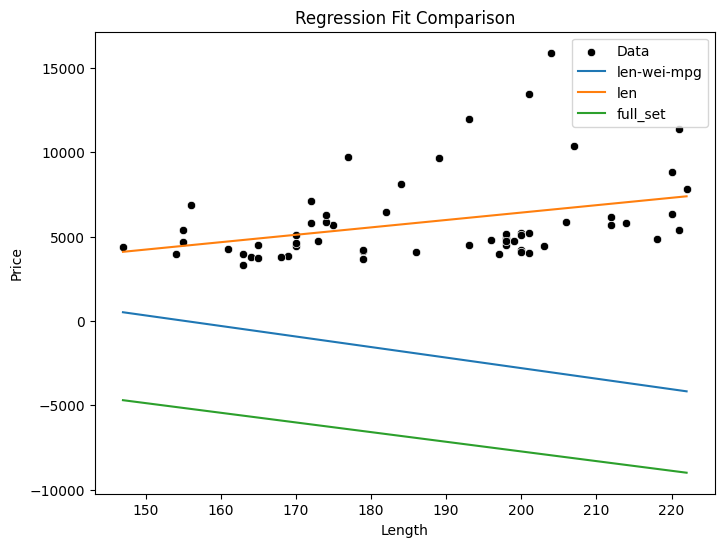

In [59]:
#length comparision
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_x["length"], y=train_y['price'], label="Data", color="black")

for key,values in length_plot.items():
  coef, intercept = values.values()
  name = key
  x = np.linspace(train_x["length"].min(), train_x["length"].max(), 1000)
  y = coef * x + intercept
  sns.lineplot(x=x, y=y, label=name)

# Labels and title
plt.xlabel("Length")
plt.ylabel("Price")
plt.title("Regression Fit Comparison")
plt.legend()
plt.show()

In [60]:
#weight
weight_plot = {
    'len-wei-mpg':{
    'coef' : res['len-wei-mpg']['coef'].flatten()[1],
    'intercept' : res['len-wei-mpg']['intercept'].flatten()[0]
    },
    'wei' : {
        'coef' : res['wei']['coef'].flatten()[0],
    'intercept' : res['wei']['intercept'].flatten()[0]
    },
    'full_set' : {
        'coef' : res['full_set']['coef'].flatten()[4],
    'intercept' : res['full_set']['intercept'].flatten()[0]
    }

}


In [61]:
weight_plot

{'len-wei-mpg': {'coef': 3.019, 'intercept': 9711.448},
 'wei': {'coef': 1.601, 'intercept': 1094.709},
 'full_set': {'coef': 4.621, 'intercept': 3734.94}}

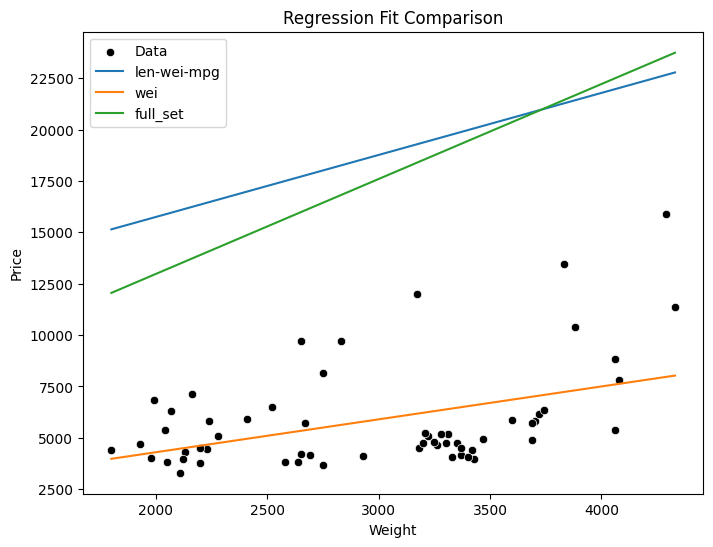

In [65]:
#weight comparisions
#length comparision
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_x['weight'], y=train_y['price'], label="Data", color="black")

for key,values in weight_plot.items():
  coef, intercept = values.values()
  name = key
  x = np.linspace(train_x["weight"].min(), train_x["weight"].max(), 1000)
  y = coef * x + intercept
  sns.lineplot(x=x, y=y, label=name)

# Labels and title
plt.xlabel("Weight")
plt.ylabel("Price")
plt.title("Regression Fit Comparison")
plt.legend()
plt.show()